This example notebook applies UncRegression to small calibration datasets for three ions. It fits separate linear models and uses find_x to estimate concentrations that correspond to control current values. The notebook exists to demonstrate the end-to-end workflow on realistic tabular data. After completing it, the reader should be able to set up the data, fit the models, and interpret the inferred control concentrations.


Import pandas, matplotlib, and the regression class.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from unc_tools import UncRegression


Assemble the concentration and current measurements, plus control targets.


In [2]:
df = pd.DataFrame({})

df["C_Na"] = [2.5, 5, 10, 15, 20]
df["I_Na"] = [16, 25, 41, 51, 66]

df["C_K"]  = [1, 2, 3, 4, 5]
df["I_K"] = [139,264, 388, 515, 632]

df["C_Ca"] = [0.1, 0.2, 0.3, 0.4, 0.5]
df["I_Ca"] = [32, 62, 93, 125, 155]

control_dict = {"Na": 44, "K": 433, "Ca": 71}

df


,C_Na,I_Na,C_K,I_K,C_Ca,I_Ca
0,2.5,16,1,139,0.1,32
1,5.0,25,2,264,0.2,62
2,10.0,41,3,388,0.3,93
3,15.0,51,4,515,0.4,125
4,20.0,66,5,632,0.5,155


Fit a regression for each ion, solve for the control concentration, and plot the results.


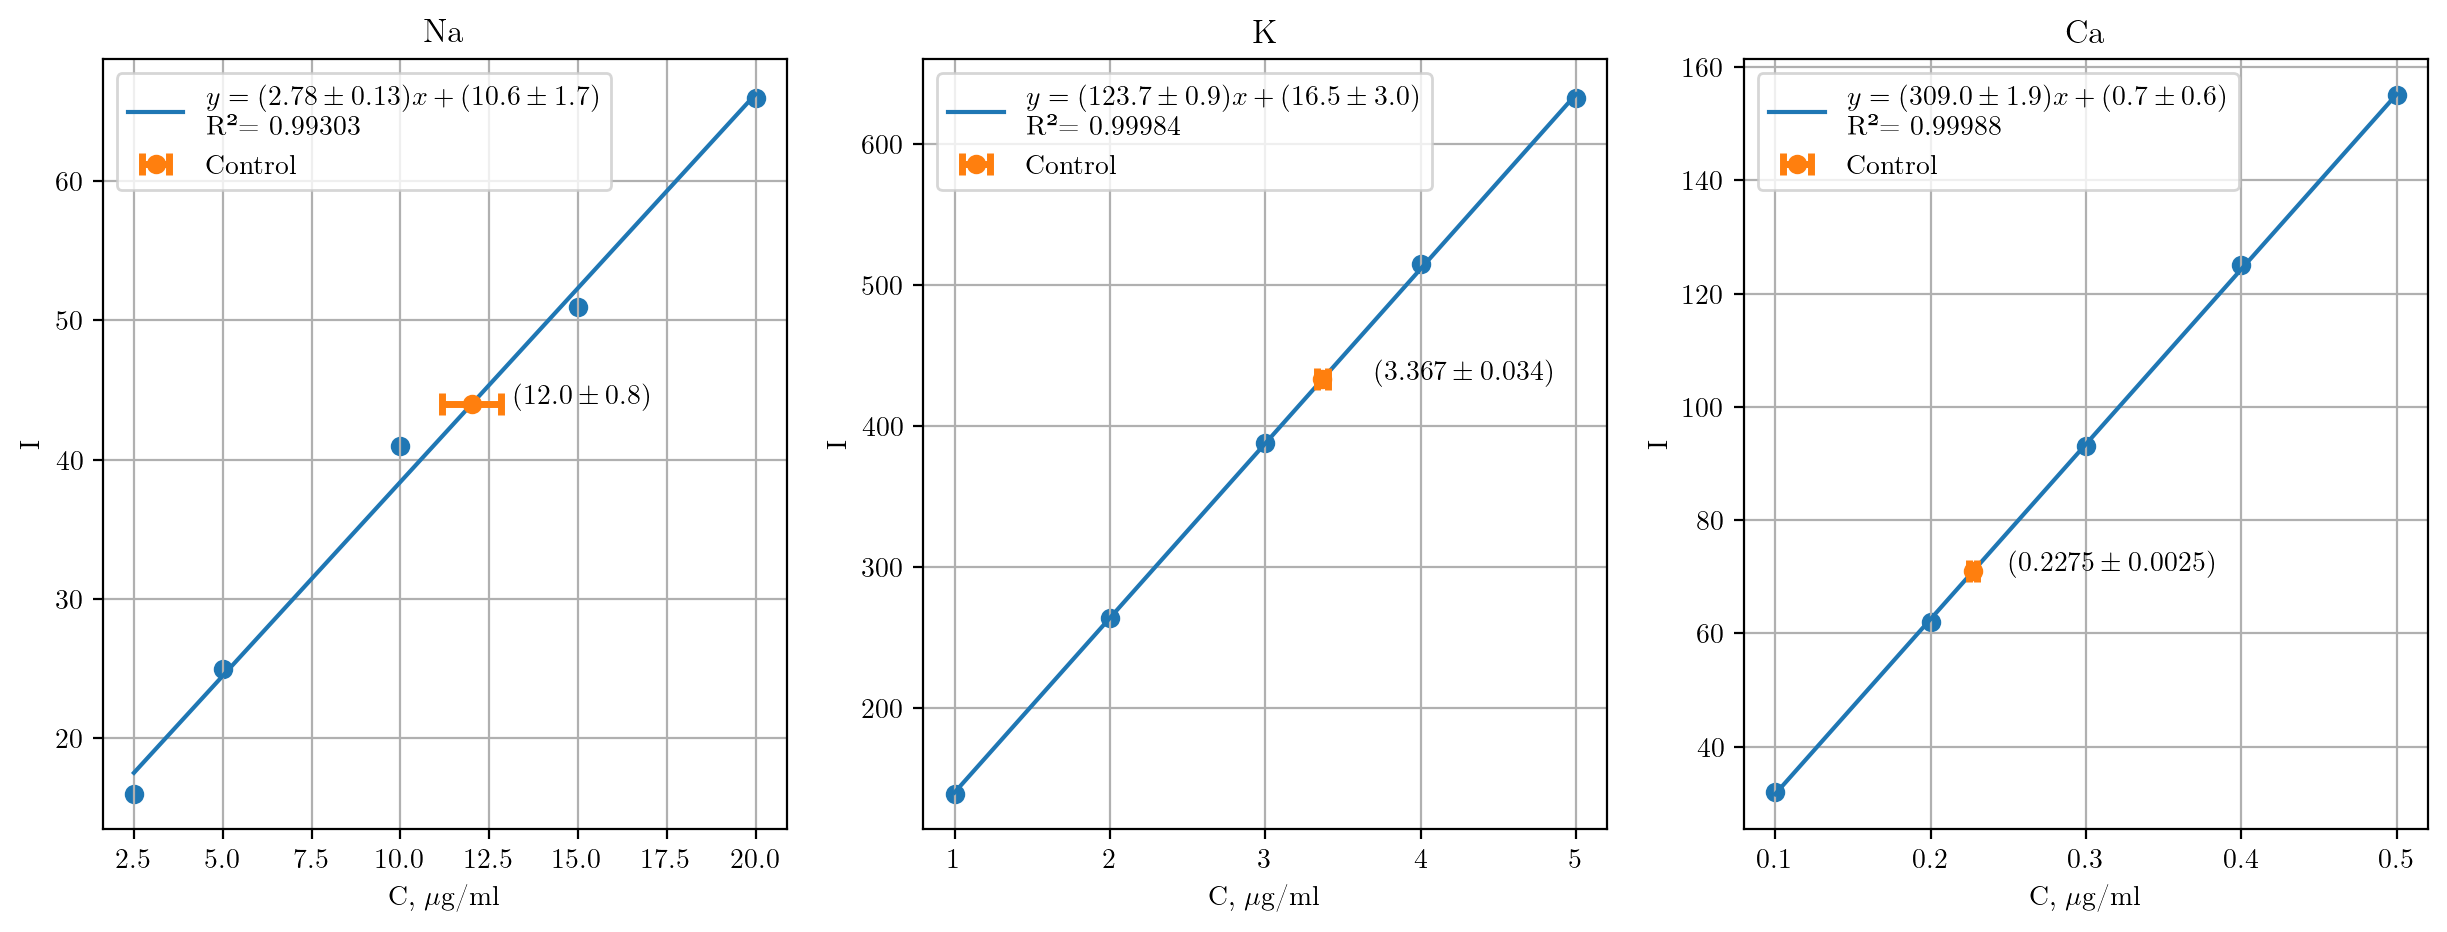

In [3]:
import unc_tools.patches
UncRegression.latex_style(True)

fig, axes = plt.subplots(1,3,figsize=(15,5), dpi=200)
axes = axes.flatten()
result = []

for i, name in enumerate(control_dict.keys()):

    C = df[f"C_{name}"]
    I = df[f"I_{name}"]
    y0 = control_dict[name]
    ax = axes[i]
    
    reg = UncRegression(C,I)
    # Solve for concentration at the control current.
    x0 = reg.find_x(y0)
    result.append(x0)
    
    reg.plot(ax=ax)
    ax.scatter(x0,y0, label = "Control")

    ax.text(x0.n*1.1,y0,f"$({x0})$".replace("+/-", "\\pm"))
    ax.set_xlabel("C, $\\mu$g/ml")
    ax.set_ylabel("I")
    ax.set_title(name)
    ax.legend()




Print the estimated control concentrations.


In [4]:
for i, name in enumerate(control_dict.keys()):
    print(f"C_{name}\t= {result[i]:.3f}")


C_Na	= 12.009+/-0.831
C_K	= 3.367+/-0.034
C_Ca	= 0.228+/-0.002
